In [1]:
import pandas as pd

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
file = "/content/gdrive/My Drive/EDA/global_terror.csv"

In [4]:
df = pd.read_csv(file)

In [5]:
df.head()

,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,longitude,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,gname,weaptype1,weaptype1_txt,nkill,propextent,propextent_txt
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1,Assassination,14,Private Citizens & Property,58.0,Dominican Republic,MANO-D,13,Unknown,1.0,NaN,NaN
1,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),21.0,Belgium,23rd of September Communist League,13,Unknown,0.0,NaN,NaN
2,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,10,Journalists & Media,217.0,United States,Unknown,13,Unknown,1.0,NaN,NaN
3,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,3,Bombing/Explosion,7,Government (Diplomatic),217.0,United States,Unknown,6,Explosives,2.0,NaN,NaN
4,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,7,Facility/Infrastructure Attack,7,Government (Diplomatic),217.0,United States,Unknown,8,Incendiary,2.0,NaN,NaN


In [6]:
df.isna().sum()

iyear                   0
imonth                  0
iday                    0
country                 0
country_txt             0
region                  0
region_txt              0
provstate               2
city                  426
latitude             4580
longitude            4581
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
natlty1              1722
natlty1_txt          1722
gname                   0
weaptype1               0
weaptype1_txt           0
nkill                   0
propextent         124178
propextent_txt     124178
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.head()

,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,longitude,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,gname,weaptype1,weaptype1_txt,nkill,propextent,propextent_txt
5,1970,1,1,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,2,Armed Assault,3,Police,217.0,United States,Black Nationalists,5,Firearms,0.0,3.0,Minor (likely < $1 million)
7,1970,1,2,217,United States,1,North America,California,Oakland,37.791927,-122.225906,3,Bombing/Explosion,21,Utilities,217.0,United States,Unknown,6,Explosives,0.0,3.0,Minor (likely < $1 million)
8,1970,1,2,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,7,Facility/Infrastructure Attack,4,Military,217.0,United States,New Year's Gang,8,Incendiary,0.0,3.0,Minor (likely < $1 million)
9,1970,1,3,217,United States,1,North America,Wisconsin,Madison,43.072950,-89.386694,7,Facility/Infrastructure Attack,2,Government (General),217.0,United States,New Year's Gang,8,Incendiary,0.0,3.0,Minor (likely < $1 million)
10,1970,1,1,217,United States,1,North America,Wisconsin,Baraboo,43.468500,-89.744299,3,Bombing/Explosion,4,Military,217.0,United States,"Weather Underground, Weathermen",6,Explosives,0.0,3.0,Minor (likely < $1 million)


In [9]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region',
       'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'natlty1', 'natlty1_txt', 'gname', 'weaptype1', 'weaptype1_txt',
       'nkill', 'propextent', 'propextent_txt'],
      dtype='object')

In [10]:
df.region_txt.nunique()

12

In [11]:
df.region_txt.unique()

array(['North America', 'South America', 'Southeast Asia',
       'Eastern Europe', 'Western Europe', 'Middle East & North Africa',
       'Central America & Caribbean', 'East Asia',
       'Australasia & Oceania', 'Sub-Saharan Africa', 'South Asia',
       'Central Asia'], dtype=object)

In [12]:
df.country_txt.nunique()

184

In [13]:
df.country_txt.unique()

array(['United States', 'Uruguay', 'Philippines', 'East Germany (GDR)',
       'West Germany (FRG)', 'Switzerland', 'Jordan', 'Egypt',
       'Argentina', 'Greece', 'Iran', 'United Kingdom', 'Turkey', 'Spain',
       'Dominican Republic', 'Netherlands', 'Italy', 'Venezuela',
       'South Yemen', 'Israel', 'Poland', 'Brazil', 'Taiwan', 'Australia',
       'Panama', 'Ireland', 'Sweden', 'France', 'South Vietnam',
       'Algeria', 'El Salvador', 'Lebanon', 'Thailand', 'Belgium',
       'Cyprus', 'Peru', 'Chile', 'Honduras', 'Yugoslavia', 'Singapore',
       'Mexico', 'Kuwait', 'Ethiopia', 'North Yemen', 'Syria', 'Pakistan',
       'Nicaragua', 'Kenya', 'Colombia', 'Japan', 'Guatemala', 'Malaysia',
       'Portugal', 'Austria', 'Bahamas', 'Costa Rica',
       'West Bank and Gaza Strip', 'Bolivia', 'Barbados', 'Ecuador',
       'Myanmar', 'Iraq', 'Angola', 'Mauritania', 'South Africa',
       'Rhodesia', 'Soviet Union', 'Guyana', 'Namibia', 'Morocco',
       'Mozambique', 'Jamaica', 'Indi

In [14]:
df.region_txt.nunique()

12

In [15]:
df.country_txt.unique()

array(['United States', 'Uruguay', 'Philippines', 'East Germany (GDR)',
       'West Germany (FRG)', 'Switzerland', 'Jordan', 'Egypt',
       'Argentina', 'Greece', 'Iran', 'United Kingdom', 'Turkey', 'Spain',
       'Dominican Republic', 'Netherlands', 'Italy', 'Venezuela',
       'South Yemen', 'Israel', 'Poland', 'Brazil', 'Taiwan', 'Australia',
       'Panama', 'Ireland', 'Sweden', 'France', 'South Vietnam',
       'Algeria', 'El Salvador', 'Lebanon', 'Thailand', 'Belgium',
       'Cyprus', 'Peru', 'Chile', 'Honduras', 'Yugoslavia', 'Singapore',
       'Mexico', 'Kuwait', 'Ethiopia', 'North Yemen', 'Syria', 'Pakistan',
       'Nicaragua', 'Kenya', 'Colombia', 'Japan', 'Guatemala', 'Malaysia',
       'Portugal', 'Austria', 'Bahamas', 'Costa Rica',
       'West Bank and Gaza Strip', 'Bolivia', 'Barbados', 'Ecuador',
       'Myanmar', 'Iraq', 'Angola', 'Mauritania', 'South Africa',
       'Rhodesia', 'Soviet Union', 'Guyana', 'Namibia', 'Morocco',
       'Mozambique', 'Jamaica', 'Indi

In [16]:
df.city.nunique()

17895

In [17]:
df.city.unique()


array(['Cairo', 'Oakland', 'Madison', ..., 'Sharana district',
       'Niambourgou', 'Sorkhi Sang'], dtype=object)

In [18]:
df.attacktype1_txt.nunique()

9

In [19]:
df.attacktype1_txt.unique()

array(['Armed Assault', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Assassination',
       'Hostage Taking (Barricade Incident)', 'Unknown',
       'Hostage Taking (Kidnapping)', 'Hijacking', 'Unarmed Assault'],
      dtype=object)

In [20]:
# Remove Some Error data
region_list = df.region_txt.unique().tolist()

In [21]:
region_dict = {}
for i in region_list:
    region_dict[i] = df[df['region_txt'] == i].country_txt.unique().tolist()

In [22]:
print(region_dict)
print(len(region_dict))

{'North America': ['United States', 'Mexico', 'Canada'], 'South America': ['Uruguay', 'Argentina', 'Venezuela', 'Brazil', 'Peru', 'Chile', 'Colombia', 'Bolivia', 'Ecuador', 'Guyana', 'Suriname', 'French Guiana', 'Paraguay'], 'Southeast Asia': ['Philippines', 'South Vietnam', 'Thailand', 'Singapore', 'Malaysia', 'Myanmar', 'Cambodia', 'Indonesia', 'East Timor', 'Laos', 'Vietnam'], 'Eastern Europe': ['East Germany (GDR)', 'Poland', 'Yugoslavia', 'Soviet Union', 'Albania', 'Bulgaria', 'Moldova', 'Bosnia-Herzegovina', 'Russia', 'Macedonia', 'Ukraine', 'Slovak Republic', 'Hungary', 'Latvia', 'Belarus', 'Estonia', 'Kosovo', 'Croatia', 'Slovenia', 'Montenegro', 'Czech Republic', 'Serbia-Montenegro', 'Serbia', 'Lithuania'], 'Western Europe': ['West Germany (FRG)', 'Switzerland', 'Greece', 'United Kingdom', 'Spain', 'Netherlands', 'Italy', 'Ireland', 'Sweden', 'France', 'Belgium', 'Cyprus', 'Portugal', 'Austria', 'Denmark', 'Luxembourg', 'Germany', 'Norway', 'Finland', 'Iceland', 'Malta'], 'Mid

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


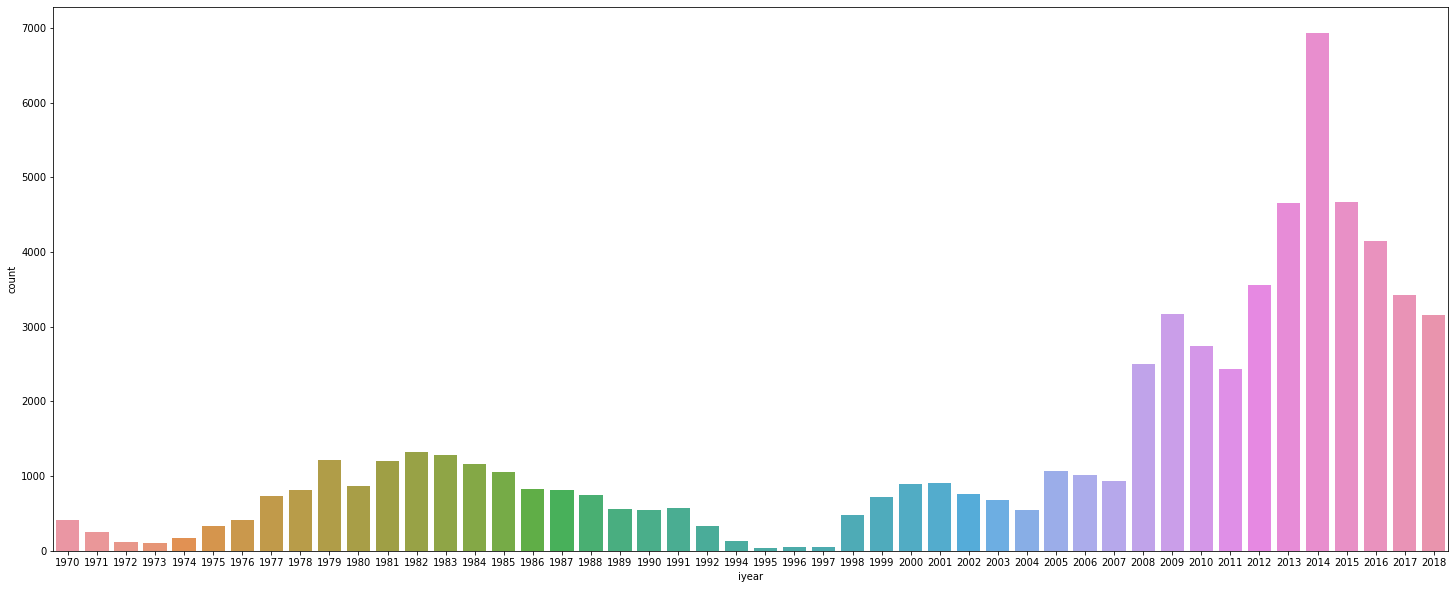

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="iyear", data=df)

In [33]:
gk = df.groupby(['country_txt', 'attacktype1_txt'])

In [34]:
gk.head()

,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,longitude,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,gname,weaptype1,weaptype1_txt,nkill,propextent,propextent_txt
5,1970,1,1,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,2,Armed Assault,3,Police,217.0,United States,Black Nationalists,5,Firearms,0.0,3.0,Minor (likely < $1 million)
7,1970,1,2,217,United States,1,North America,California,Oakland,37.791927,-122.225906,3,Bombing/Explosion,21,Utilities,217.0,United States,Unknown,6,Explosives,0.0,3.0,Minor (likely < $1 million)
8,1970,1,2,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,7,Facility/Infrastructure Attack,4,Military,217.0,United States,New Year's Gang,8,Incendiary,0.0,3.0,Minor (likely < $1 million)
9,1970,1,3,217,United States,1,North America,Wisconsin,Madison,43.072950,-89.386694,7,Facility/Infrastructure Attack,2,Government (General),217.0,United States,New Year's Gang,8,Incendiary,0.0,3.0,Minor (likely < $1 million)
10,1970,1,1,217,United States,1,North America,Wisconsin,Baraboo,43.468500,-89.744299,3,Bombing/Explosion,4,Military,217.0,United States,"Weather Underground, Weathermen",6,Explosives,0.0,3.0,Minor (likely < $1 million)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190098,2018,11,1,195,Sudan,11,Sub-Saharan Africa,South Darfur,Kombo Aliba,12.560911,24.254639,5,Hostage Taking (Barricade Incident),14,Private Citizens & Property,195.0,Sudan,Unknown,9,Melee,0.0,3.0,Minor (likely < $1 million)
190569,2018,11,19,158,Paraguay,3,South America,San Pedro,Santa Rosa del Aguaray,-23.800845,-56.502802,6,Hostage Taking (Kidnapping),14,Private Citizens & Property,30.0,Brazil,Paraguayan People's Army (EPP),5,Firearms,1.0,3.0,Minor (likely < $1 million)
190604,2018,11,22,146,Niger,11,Sub-Saharan Africa,Diffa,Toumour,13.667230,13.119550,6,Hostage Taking (Kidnapping),9,Food or Water Supply,69.0,France,Boko Haram,5,Firearms,8.0,3.0,Minor (likely < $1 million)
191053,2018,12,12,1001,Serbia,9,Eastern Europe,Belgrade,Belgrade,44.674128,20.590071,1,Assassination,10,Journalists & Media,175.0,Serbia-Montenegro,Unknown,5,Firearms,0.0,3.0,Minor (likely < $1 million)


In [36]:
gk.first() 

iyear  ...               propextent_txt
country_txt attacktype1_txt                             ...                             
Afghanistan Armed Assault                         1999  ...                      Unknown
            Assassination                         2004  ...  Minor (likely < $1 million)
            Bombing/Explosion                     1979  ...  Minor (likely < $1 million)
            Facility/Infrastructure Attack        2001  ...  Minor (likely < $1 million)
            Hijacking                             2009  ...                      Unknown
...                                                ...  ...                          ...
Zimbabwe    Bombing/Explosion                     1980  ...                      Unknown
            Facility/Infrastructure Attack        2002  ...                      Unknown
            Hostage Taking (Barricade Incident)   2017  ...  Minor (likely < $1 million)
            Hostage Taking (Kidnapping)           1980  ...                      Unknown
            Unknown                               2001  ...  Minor (likely < $1 million)

[846 rows x 21 columns]

In [87]:
df.country_txt.value_counts().head(30)

Iraq                        9284
Pakistan                    6293
Afghanistan                 5165
India                       3708
El Salvador                 2769
Colombia                    2590
Philippines                 2237
Nigeria                     2183
Thailand                    1821
United States               1655
Peru                        1526
Somalia                     1517
Spain                       1293
Turkey                      1200
Yemen                       1165
United Kingdom              1150
France                       979
Russia                       961
Nicaragua                    939
Syria                        876
Chile                        857
Libya                        836
Italy                        777
Israel                       725
Guatemala                    689
Egypt                        682
Algeria                      673
Greece                       671
Lebanon                      664
West Bank and Gaza Strip     626
Name: coun